<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [ ]:
#For the "Median value of owner-occupied homes" provide a boxplot

#Provide a  bar plot for the Charles river variable

#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

#Create a histogram for the pupil to teacher ratio variable

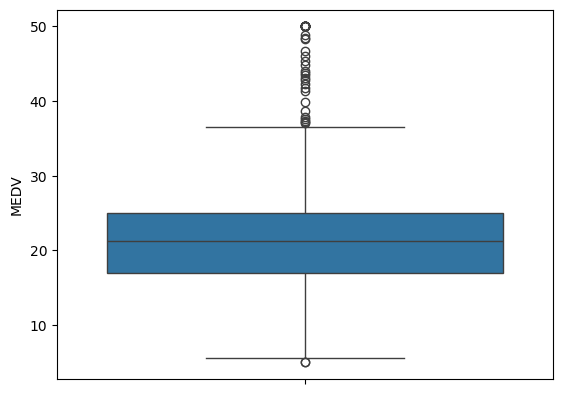

In [6]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y = 'MEDV', data = boston_df)

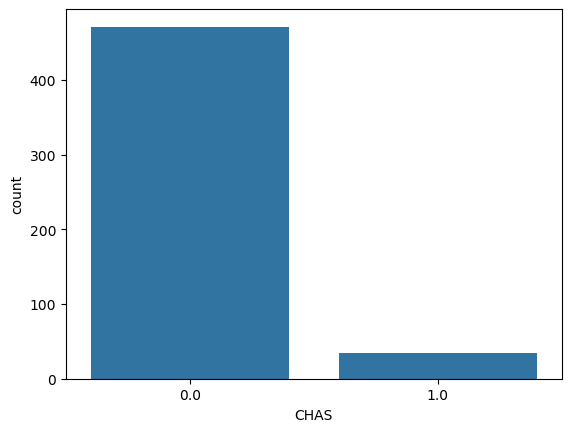

In [9]:
#Provide a  bar plot for the Charles river variable
ax = sns.countplot(x = 'CHAS', data = boston_df)


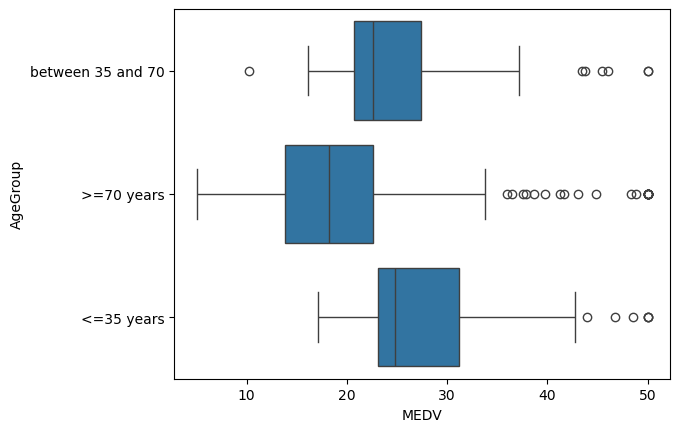

In [13]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'AgeGroup'] = '<=35 years'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AgeGroup'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AgeGroup'] = '>=70 years'

ax = sns.boxplot(x = 'MEDV', y = 'AgeGroup', data = boston_df)

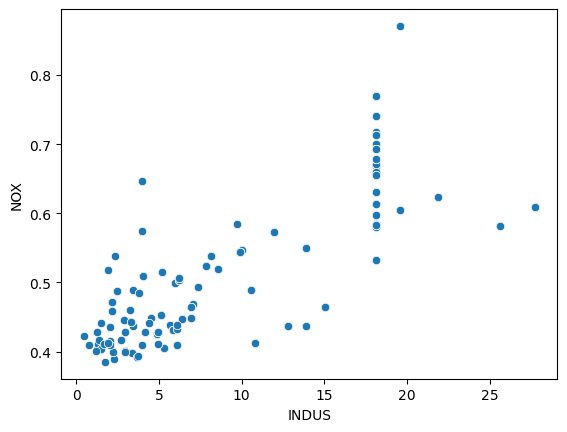

In [14]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)


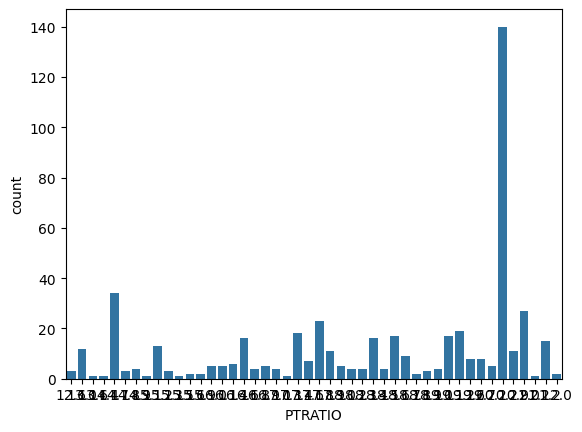

In [15]:
#Create a histogram for the pupil to teacher ratio variable
ax = sns.countplot(x = 'PTRATIO', data = boston_df)


In [ ]:
##For each of the following questions;

#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#Be sure to:

#State your hypothesis.

#Use α = 0.05

#Perform the test Statistics.

#State the conclusion from the test.

In [5]:
#Is there a significant difference in median value of houses bounded 
#by the Charles river or not? (T-test for independent samples)


In [17]:
#State your hypothesis.
#Null:no significant diff in median value between houses bounded by the Charles river or not
#Alt: significant diff in median value


#Use α = 0.05

#Perform the test Statistics.
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)
#State the conclusion from the test.
#p-value is less than alpha, so reject the null; there is a significan diff in median value

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [ ]:
#Is there a difference in Median values of houses (MEDV)
#for each proportion of owner occupied units built prior
#to 1940 (AGE)? (ANOVA)


In [18]:
#State your hypothesis.
#Null:no significant diff in median value of values of houses for each proportion of owner occupied units built prior to 1940
#Alt: significant diff in median value


#Use α = 0.05

#Perform the test Statistics.
from statsmodels.formula.api import ols
sm.stats.anova_lm(ols('MEDV ~ AGE', data = boston_df).fit())
#State the conclusion from the test.
#p-value is less than alpha, so reject the null; there is a significan diff in median value

,df,sum_sq,mean_sq,F,PR(>F)
AGE,1.0,6069.761065,6069.761065,83.477459,1.569982e-18
Residual,504.0,36646.534350,72.711378,NaN,NaN


In [ ]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


In [19]:
#State your hypothesis.
#Null:no significant correlation between nitric oxide concentrations and proportion of non-retail business acres per town
#Alt: significant correlation 

#Perform the test Statistics.
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
#State the conclusion from the test.
#p-value is less than alpha, so reject the null; there is a significant correlation

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [ ]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [20]:
#State your hypothesis.
#Null:no significant impact of additional weighted distance to the 5 Boston employment centers on the medv of owner occupied homes
#Alt: significant impact 

#Perform the test Statistics.
x = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

model = sm.OLS(y, x).fit()
model.summary()
#State the conclusion from the test.
#p-value is of the variable is less than alpha, so reject the null. Significant positive impact (pos. coeff)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        09:40:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""